In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sber_data = pd.read_csv('sber_data.csv', sep=',')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [3]:
sber_data.tail()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


In [4]:
sber_data.shape

(30471, 61)

In [5]:
sber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

In [6]:
sber_data['sub_area'].nunique()

146

In [7]:
sber_data['price_doc'].max()

111111112

In [8]:
sber_data['ecology'] = sber_data['ecology'].astype('category')
sber_data['ecology'] = sber_data['ecology'].cat.rename_categories({
    'good': 'Хорошая',
    'excellent': 'Отличная',
    'poor': 'Плохая',
    'satisfactory': 'Удовлетворительная',
    'no data': 'Нет данных'})

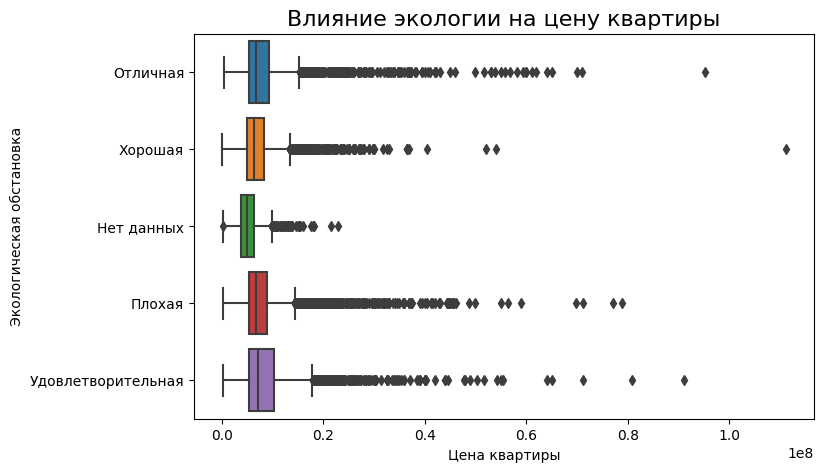

In [9]:
fig, axes = plt.subplots(figsize=(8, 5))

sns.boxplot(
    sber_data,
    x='price_doc',
    y='ecology')
axes.set_title('Влияние экологии на цену квартиры', fontsize=16);
axes.set_ylabel('Экологическая обстановка');
axes.set_xlabel('Цена квартиры');

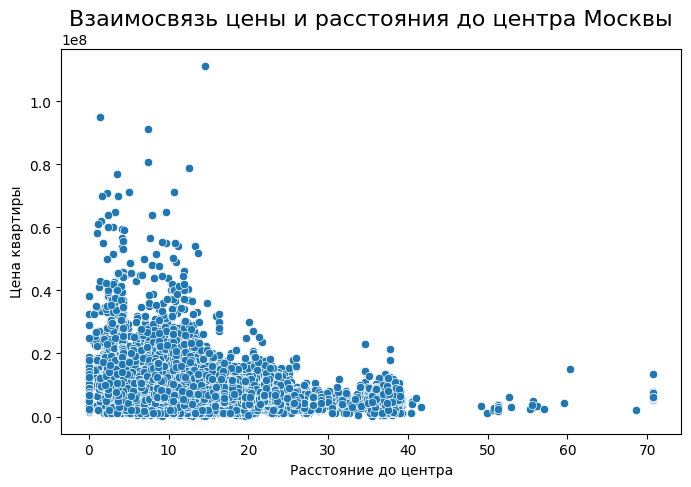

In [10]:
fig, axes = plt.subplots(figsize=(8, 5))

sns.scatterplot(
    sber_data,
    x='kremlin_km',
    y='price_doc'
);
axes.set_title('Взаимосвязь цены и расстояния до центра Москвы', fontsize=16);
axes.set_ylabel('Цена квартиры');
axes.set_xlabel('Расстояние до центра');

In [11]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    right_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > right_bound)]
    cleaned = data[(x > lower_bound) & (x < right_bound)]
    return outliers, cleaned

In [12]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


In [13]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', 1, 5)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 77
Результирующее число записей: 30385


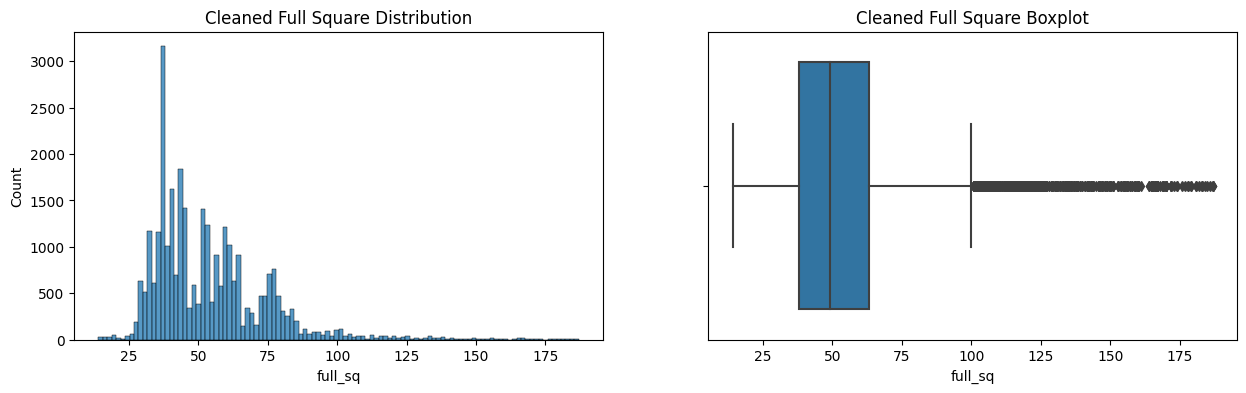

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

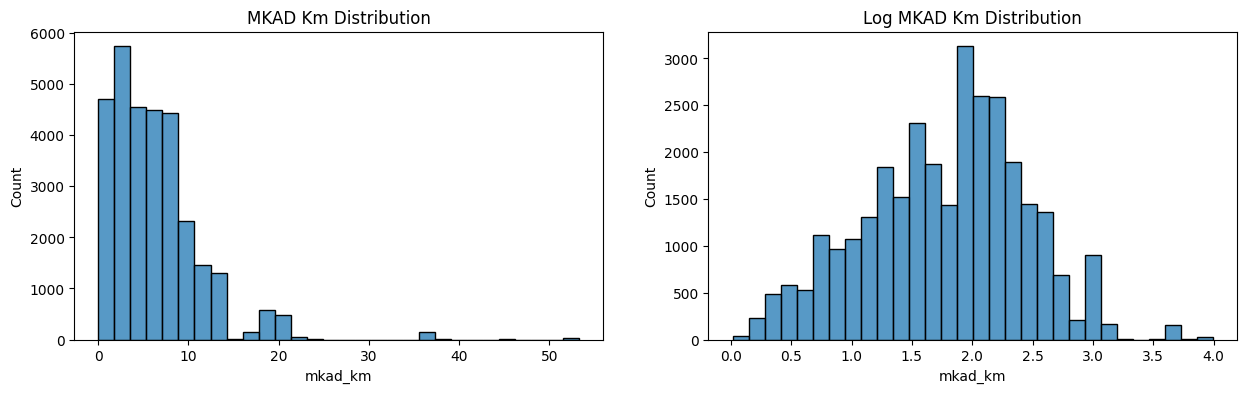

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(
    sber_data['mkad_km'],
    bins=30,
    ax=axes[0]
);
axes[0].set_title('MKAD Km Distribution');

log_mkad_km = np.log(sber_data['mkad_km'] + 1)
sns.histplot(log_mkad_km , bins=30, ax=axes[1])
axes[1].set_title('Log MKAD Km Distribution');

In [18]:
log_mkad_km.skew() #численный показатель ассиметрии

-0.14263612203024953

In [20]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [21]:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


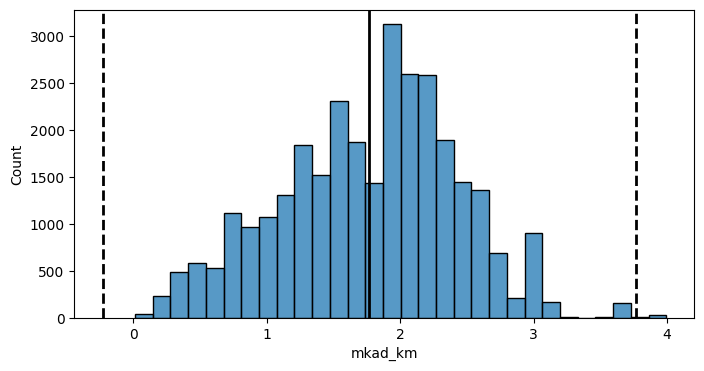

In [25]:
fig, axes = plt.subplots(figsize=(8, 4))

log_mkad_km = np.log(sber_data['mkad_km'] + 1)
sns.histplot(log_mkad_km, bins=30)
axes.axvline(log_mkad_km.mean(), color='k', lw=2);
axes.axvline(log_mkad_km.mean() - 3 * log_mkad_km.std(), color='k', lw=2, ls='--');
axes.axvline(log_mkad_km.mean() + 3 * log_mkad_km.std(), color='k', lw=2, ls='--');

In [26]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [30]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True, left=3, right=3.5)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


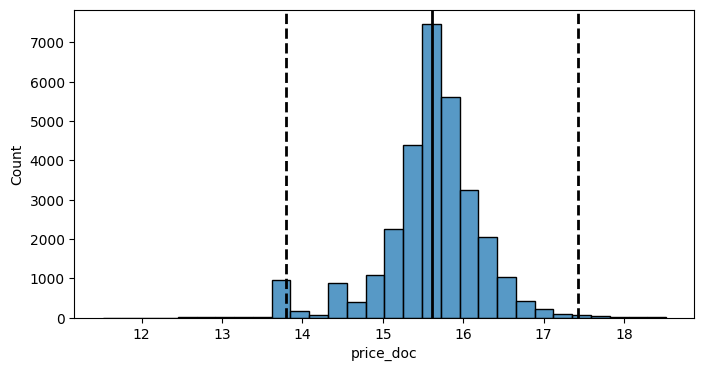

In [34]:
fig, axes = plt.subplots(figsize=(8, 4))

log_price_doc = np.log(sber_data['price_doc'])
sns.histplot(log_price_doc, bins=30)
axes.axvline(log_price_doc.mean(), color='k', lw=2);
axes.axvline(log_price_doc.mean() - 3 * log_price_doc.std(), color='k', lw=2, ls='--');
axes.axvline(log_price_doc.mean() + 3 * log_price_doc.std(), color='k', lw=2, ls='--');

In [35]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', log_scale=True, left=3.7, right=3.7)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


In [36]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    right_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > right_bound)]
    cleaned = data[(x > lower_bound) & (x < right_bound)]
    return outliers, cleaned

In [37]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', 3, 3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379
